In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np

In [ ]:
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
token_index = {}
for sample in samples:
    for word in sample.split():
        if word not in token_index:
            token_index[word] = len(token_index) + 1
max_length = 1
results = np.zeros(shape=(len(samples),
                          max_length,
                          max(token_index.values()) + 1))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i, j, index] = 1.

In [ ]:
import string
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
characters = string.printable
token_index = dict(zip(range(1, len(characters) + 1), characters))
max_length = 50
results = np.zeros((len(samples), max_length, max(token_index.keys()) + 1)) 
for i, sample in enumerate(samples):
  for j, character in enumerate(sample):
    index = token_index.get(character)
    results[i, j, index] = 1.

In [ ]:
from keras.preprocessing.text import Tokenizer
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(samples)
sequences = tokenizer.texts_to_sequences(samples)
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 9 unique tokens.


In [ ]:
from keras.datasets import imdb
from keras.preprocessing import sequence

In [ ]:
max_features = 10000
maxlen = 500
batch_size = 32
print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
17473536/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense

In [ ]:
model = Sequential()
model.add(Embedding(10000, 32))
# model.add(SimpleRNN(32, return_sequences=True))
# model.add(SimpleRNN(32, return_sequences=True))
# model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc']) 
history = model.fit(input_train, y_train, epochs=10, batch_size=128,validation_split=0.2)
model.summary()

Epoch 1/10
157/157 [==============================] - 27s 164ms/step - loss: 0.6081 - acc: 0.6531 - val_loss: 0.4816 - val_acc: 0.7854
Epoch 2/10
157/157 [==============================] - 33s 211ms/step - loss: 0.3988 - acc: 0.8331 - val_loss: 0.4083 - val_acc: 0.8176
Epoch 3/10
157/157 [==============================] - 26s 163ms/step - loss: 0.2987 - acc: 0.8803 - val_loss: 0.3957 - val_acc: 0.8218
Epoch 4/10
157/157 [==============================] - 26s 163ms/step - loss: 0.2337 - acc: 0.9097 - val_loss: 0.4340 - val_acc: 0.8064
Epoch 5/10
157/157 [==============================] - 25s 162ms/step - loss: 0.1816 - acc: 0.9326 - val_loss: 0.3781 - val_acc: 0.8560
Epoch 6/10
157/157 [==============================] - 26s 165ms/step - loss: 0.1246 - acc: 0.9567 - val_loss: 0.5679 - val_acc: 0.8298
Epoch 7/10
157/157 [==============================] - 25s 162ms/step - loss: 0.0885 - acc: 0.9686 - val_loss: 0.4482 - val_acc: 0.8496
Epoch 8/10
157/157 [==============================] - 2

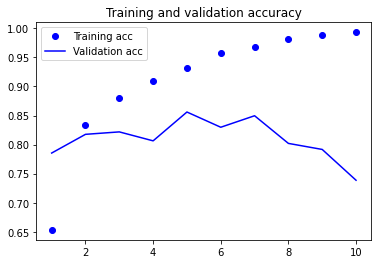

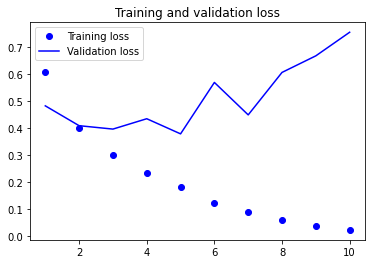

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
from keras.layers import LSTM
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 64s 393ms/step - loss: 0.5207 - acc: 0.7524 - val_loss: 0.3916 - val_acc: 0.8450
Epoch 2/10
157/157 [==============================] - 60s 384ms/step - loss: 0.3001 - acc: 0.8839 - val_loss: 0.2835 - val_acc: 0.8876
Epoch 3/10
157/157 [==============================] - 56s 356ms/step - loss: 0.2368 - acc: 0.9106 - val_loss: 0.2764 - val_acc: 0.8858
Epoch 4/10
157/157 [==============================] - 54s 345ms/step - loss: 0.1994 - acc: 0.9272 - val_loss: 0.3272 - val_acc: 0.8584
Epoch 5/10
157/157 [==============================] - 55s 347ms/step - loss: 0.1759 - acc: 0.9365 - val_loss: 0.3166 - val_acc: 0.8616
Epoch 6/10
157/157 [==============================] - 54s 347ms/step - loss: 0.1639 - acc: 0.9402 - val_loss: 0.3051 - val_acc: 0.8888
Epoch 7/10
157/157 [==============================] - 54s 344ms/step - loss: 0.1440 - acc: 0.9477 - val_loss: 0.3481 - val_acc: 0.8842
Epoch 8/10
157/157 [==============================] - 5

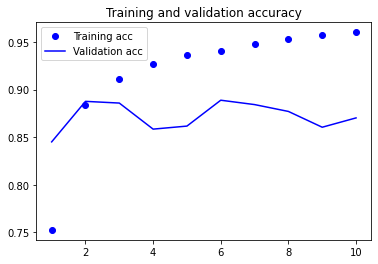

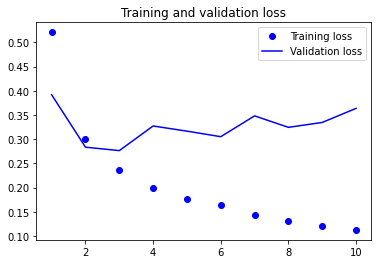

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
%cd /content/drive/MyDrive/WFU Courses/DL_ML/RNN HW

/content/drive/MyDrive/WFU Courses/DL_ML/RNN HW


In [ ]:
%pwd

'/content/drive/MyDrive/WFU Courses/DL_ML/RNN HW/jena_climate/jena_climate'

In [ ]:
%rm -r /content/drive/MyDrive/WFU Courses/DL_ML/RNN HW/jena_climate/jena_climate

In [ ]:
!mkdir jena_climate
%cd jena_climate
!wget https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip unzip jena_climate_2009_2016.csv.zip
!unzip jena_climate_2009_2016.csv.zip

In [ ]:
%cd jena_climate

/content/drive/MyDrive/WFU Courses/DL_ML/RNN HW/jena_climate


In [ ]:
import os
import numpy as np
# data_dir = '/users/fchollet/Downloads/jena_climate'
# fname = os.path.join(data_dir, 'jena_climate_2009_2016.csv')
fname = os.path.join('jena_climate_2009_2016.csv')
f = open(fname)
data = f.read()
f.close()
lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]
print(header)
print(len(lines))


['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420451


In [ ]:
float_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(',')[1:]]
    float_data[i, :] = values


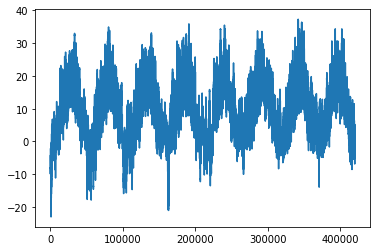

In [ ]:
from matplotlib import pyplot as plt
temp = float_data[:, 1]  #<1> temperature (in degrees Celsius)
plt.plot(range(len(temp)), temp)

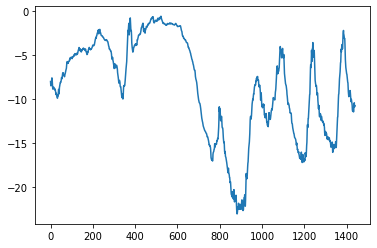

In [ ]:
plt.plot(range(1440), temp[:1440])

In [ ]:
mean = float_data[:200000].mean(axis=0)
float_data -= mean
std = float_data[:200000].std(axis=0)
float_data /= std

In [ ]:
def generator(data, lookback, delay, min_index, max_index,
              shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)
        samples = np.zeros((len(rows),
                           lookback // step,
                           data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples, targets

In [ ]:
lookback = 1440
step = 6
delay = 144
batch_size = 128

In [ ]:
train_gen = generator(float_data,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=200000,
                      shuffle=True,
                      step=step,
                      batch_size=batch_size)
val_gen = generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=200001,
                    max_index=300000,
                    step=step,
                    batch_size=batch_size)
test_gen = generator(float_data,
                     lookback=lookback,
                     delay=delay,
                     min_index=300001,
                     max_index=None,
                     step=step,
                     batch_size=batch_size)
val_steps = (300000 - 200001 - lookback)
test_steps = (len(float_data) - 300001 - lookback)


In [ ]:
from keras.models import Sequential 
from keras import layers
from tensorflow.keras.optimizers import Adam, RMSprop
model = Sequential()
model.add(layers.Flatten(input_shape=(lookback // step, float_data.shape[-1]))) 
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae') 
history = model.fit_generator(train_gen,
                              steps_per_epoch=500, 
                              epochs=20, 
                              validation_data=val_gen, 
                              validation_steps=val_steps)


Epoch 1/20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  del sys.path[0]


500/500 [==============================] - 898s 2s/step - loss: 1.6236 - val_loss: 0.7304
Epoch 2/20
500/500 [==============================] - 930s 2s/step - loss: 0.5951 - val_loss: 0.3143
Epoch 3/20
500/500 [==============================] - 929s 2s/step - loss: 0.3177 - val_loss: 0.3065
Epoch 4/20
500/500 [==============================] - 868s 2s/step - loss: 0.2722 - val_loss: 0.3380
Epoch 5/20
498/500 [============================>.] - ETA: 0s - loss: 0.2573

In [ ]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import Adam, RMSprop
model = Sequential()
model.add(layers.GRU(32, input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)


In [ ]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()